In [15]:
%pip install --upgrade pip
%pip install matplotlib
%pip install osmnx
%pip install networkx
%pip install csv
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


Note: you may need to restart the kernel to use updated packages.


In [2]:

import networkx as nx
import osmnx as ox
import numpy as np
import time
import matplotlib as plt
import csv
import random
from dijkstra_algorithm import dijkstra_algorithm
from dijkstra_algorithm import make_route
from dijkstra_algorithm import dijkstra_algorithm_driver
from deliveries import delivery
from other_funcs import *
from minheap import MinHeap
from maxheap import MaxHeap
from driver import driver
import heapq

ox.__version__
random.seed(None)

In [3]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("Chicago, Illinois, USA", network_type="drive")
Gc = ox.utils_graph.get_largest_component(G, strongly=True)

Need to make a list of all restaurants using what is below this markdown

In [4]:
file = open('Food_Inspections_20240223.csv')
type(file)

csvreader = csv.reader(file)
header = []
header = next(csvreader)
header

food_inspections = []
filled_locations = []

rows = []
for row in csvreader:
    rows.append(row)

I condensed all the sections into a single function that does the graphing.

In [5]:
def get_graph(num_of_drivers,num_of_deliveries,graph,restaurants):
    N_L = list(graph.nodes)[None:None:None]
    graph = ox.speed.add_edge_speeds(graph)
    graph = ox.speed.add_edge_travel_times(graph)
    items = random_restaurant_locations(restaurants,num_of_deliveries)
    list_nodes = find_node(items,graph)

    list_of_deliveries = []
    for i in list_nodes:
        d = delivery(i,N_L)
        list_of_deliveries.append(d)
    
    drivers = []
    for i in range(num_of_drivers):
        single = driver(N_L)
        drivers.append(single)
    find_routes_for_res_to_dropoff(graph,list_of_deliveries)
    restaurant_set = set()
    for i in list_of_deliveries:
        restaurant_set.add(i.restaurant_loc)
    
    find_shortest_driver_dikstra_rest_heap(graph,list_of_deliveries,drivers,restaurant_set)

    routes = []
    routes = graph_full_routes(list_of_deliveries)
    fig, ax = ox.plot_graph_routes(graph, routes, node_size=0)

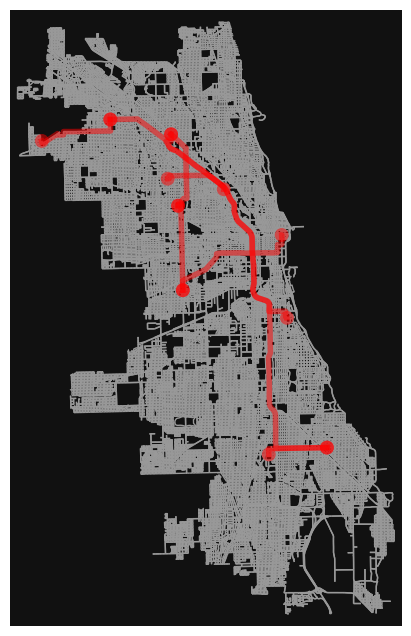

In [14]:
drivers = 3
orders = 5

get_graph(drivers,orders,Gc,rows)


In [7]:
def generate_random_input(size):
    arr = np.random.randint(0, 100000, size = size)
    return arr

In [8]:
monte_carlo_runs = 50


# Range of array sizes considered
start_array = 2
end_array = 200
increments = 2

# Initiate average and worst case run-time
avg_time_taken = [0]*(end_array//increments)
worst_time_taken = [0]*(end_array//increments)

# Run-time experiments for random arrays of a given size
count = 0
for curr_array_size in range(start_array, end_array+1, increments):  
    run_times = []
    # Given a fixed array size, generate one random array and compute its run-time
    for iteration in range(monte_carlo_runs):             
        array = generate_random_input(curr_array_size)    # Generate random array
        array = list(array)
        start = time.time()                               # Record state time
        
        end = time.time()                                 # Record end time
        run_times.append(end - start)                     # Instantaneous ruun-time for a specific random input            
        
    avg_time_taken[count] = (sum(run_times)/len(run_times)) # Empirical average of run-time
    worst_time_taken[count] = (max(run_times))              # Worst case run time across various random experiments
    count += 1

In [9]:
# Data Coordinates
x = np.arange(start_array, end_array+1, increments)
y = np.array(avg_time_taken)
z = np.array(worst_time_taken)

# Plot
plt.plot(x,y,'b',label='Avg Run Time') 
plt.plot(x,z,'r',label='Worst Run Time') 

# Add Title
plt.title("HeapSort") 

# Add Axes Labels
plt.xlabel("# of integers") 
plt.ylabel("Time Taken") 

# Display
plt.legend()
plt.show()

AttributeError: module 'matplotlib' has no attribute 'plot'